In [1]:

#
# Jung_Hyeuk_Project1.py
# MGMTMFE405-2 Computational Methods in Finance - Project 1
# Hyeuk Jung (005250560)
#


import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from math import *


# Random Number Generator - LGM Method
def randomlgm(n):
    # LGM Method parameters
    m = 2**31 - 1; a = 7**5; b = 0
    
    # Generate n random variables
    X = list()
    X.append(time.time())
    for i in range(n-1):
        X.append( (a*X[i] + b) % m ) #x1 = (a*X[i] + b) % m
    
    # Transform random numbers to follow U[0,1]
    uniform = list(map(lambda x: x/m, X))
    
    return uniform

##### 5. (a) 5000 random numbers ~ U[0, 1]
##### 5. (b) Box-Muller method
def box_muller(n):
    u1 = randomlgm(n)
    u2 = randomlgm(n)
    box_z1 = [ sqrt(-2*log(x)) * cos(2*pi*y) for x, y in zip(u1, u2) ]
    box_z2 = [ sqrt(-2*log(x)) * sin(2*pi*y) for x, y in zip(u1, u2) ]
    return (box_z1, box_z2)

def polar_marsaglia(n):
    u1 = randomlgm(n)
    u2 = randomlgm(n)
    v1 = [ 2*x - 1 for x in u1 ]
    v2 = [ 2*x - 1 for x in u2 ]
    #w = [x**2 + y**2 for x, y in zip(v1, v2)]
    w = [x*x + y*y for x, y in zip(v1, v2)]
    polar_z1 = [ y*sqrt((-2*log(x))/x) for x, y in zip(w, v1) if x <= 1 ]
    polar_z2 = [ y*sqrt((-2*log(x))/x) for x, y in zip(w, v2) if x <= 1 ]
    return (polar_z1, polar_z2)



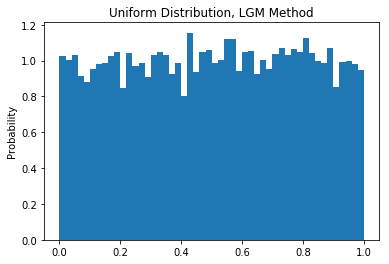

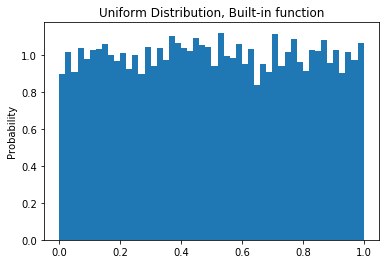

1. (c) Compare the findings in (a) and (b):
               Mean        SD
LGM       0.503442  0.286934
Built-in  0.500775  0.287329

Both trials show similar results. Means and standard deviations do not vary a lot from each other.


In [2]:
##### 1. (a) Random Number Generators using LGM method
n = 10000
uni1 = randomlgm(n)
uni1_mean = np.mean(uni1)
uni1_sd = np.std(uni1)

##### 1. (b) U[0, 1] using built-in functions
uni2 = np.random.uniform(0, 1, 10000)
uni2_mean = np.mean(uni2)
uni2_sd = np.std(uni2)

##### 1. (c) Compare results from (a) and (b)
# Used the 'density' property change the frequency to probabilities
plt.figure()
plt.hist(uni1, density = True, bins = 50)
plt.title('Uniform Distribution, LGM Method')
plt.ylabel('Probability')
plt.show()

plt.figure()
plt.hist(uni2, density = True, bins = 50)
plt.title('Uniform Distribution, Built-in function')
plt.ylabel('Probability')
plt.show()

column_names = ['Mean', 'SD']
row_names = ['LGM', 'Built-in']
matrix = np.reshape((uni1_mean, uni1_sd, uni2_mean, uni2_sd), (2, 2))
df = pd.DataFrame(matrix, columns=column_names, index=row_names)
print('1. (c) Compare the findings in (a) and (b):\n', df)
print('\nBoth trials show similar results. Means and standard deviations do not vary a lot from each other.')



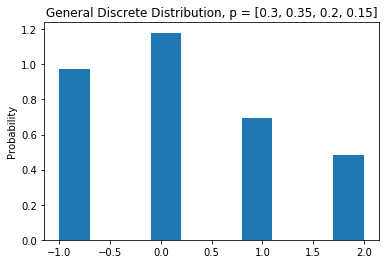

2. (b) Empirical mean and the standard deviation:
            Mean        SD
Discrete  0.208  1.019871


In [3]:
##### 2. (a) General Discrete Distributions using 1. (a) results
# p = [0.3, 0.35, 0.2, 0.15]
Z = list()
for x in uni1:
    if x < 0.3: 
        Z.append(-1)
    elif x < 0.65:
        Z.append(0)
    elif x < 0.85:
        Z.append(1)
    else:
        Z.append(2)

##### 2. (b) Histogram and the empirical mean and the sd
plt.figure()
plt.hist(Z, density = True)
plt.title('General Discrete Distribution, p = [0.3, 0.35, 0.2, 0.15]')
plt.ylabel('Probability')
plt.show()

Z_mean = np.mean(Z)
Z_sd = np.std(Z)
matrix2 = np.reshape((Z_mean, Z_sd), (1, 2))
df2 = pd.DataFrame(matrix2, columns = column_names, index=['Discrete'])
print('2. (b) Empirical mean and the standard deviation:\n', df2)



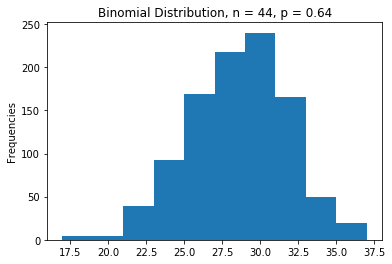

3. (b) Comparing P(X>=40) results:
           Data     Exact
Binomial   0.0  0.000048

Both results are close to zero. To obtain exact probability from the data, we need larger size of samples.


In [4]:
##### 3. (a) 1,000 random numbers with Binomial distribution with 𝑛=44 and 𝑝=0.64.
# Generate 44,000 random numbers
n = 44000
uni3 = randomlgm(n)
temp = [1 if x < 0.64 else 0 for x in uni3]

# Binomial = sum(Bernoulli)
binomial = [ sum(temp[x:x+44]) for x in range(0, len(temp), 44) ]

##### 3. (b) Histogram and P(X >= 40)
plt.figure()
plt.hist(binomial)
plt.title('Binomial Distribution, n = 44, p = 0.64')
plt.ylabel('Frequencies')
plt.show()

# Probability from the data
freq = 0
for i in range(40, 45):
    freq += binomial.count(i)

# Probability of the exact number using pmf and cdf
n = 44; p = 0.64
p_39 = 0
for i in range(40):
    # i: from 0 to 39
    p_39 += binom.pmf(i, n, p)
# 1- binom.cdf(39, n, p, loc=0) # using cdf

matrix3 = np.reshape((freq / len(binomial), 1- p_39), (1, 2))
df3 = pd.DataFrame(matrix3, columns = ['Data', 'Exact'], index=['Binomial'])
print('3. (b) Comparing P(X>=40) results:\n', df3)
print('\nBoth results are close to zero. To obtain exact probability from the data, we need larger size of samples.')



4. (b):
 P(X >= 1) = 0.5228522852285229 ; P(X >= 4) = 0.06820682068206821


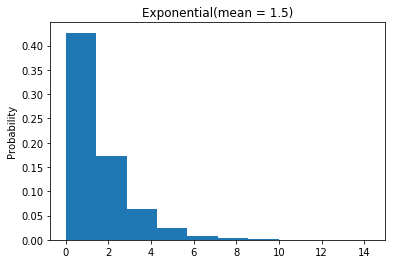


4. (c) Empirical mean and the standard deviation:
                Mean        SD
Exponential  1.5028  1.481537


In [5]:
##### 4. (a) 10000 random numbers ~ Exponential(lambda = 1.5)
gamma = 1.5
n = 10000
exp = list()
for i in range(n-1): 
    exp.append((-1) * gamma * log(1 - uni1[i]))

##### 4. (b) P(X >= 1) and P(X >= 4)
prob1 = sum(1 for i in exp if i >= 1) / len(exp)
prob4 = sum(1 for i in exp if i >= 4) / len(exp)
print('4. (b):\n', 'P(X >= 1) =', prob1, '; P(X >= 4) =', prob4)

##### 4. (c) mean, sd, and histogram
plt.figure()
plt.hist(exp, density = True)
plt.title('Exponential(mean = 1.5)')
plt.ylabel('Probability')
plt.show()

matrix4 = np.reshape((np.mean(exp), np.std(exp)), (1, 2))
df4 = pd.DataFrame(matrix4, columns = ['Mean', 'SD'], index=['Exponential'])
print('\n4. (c) Empirical mean and the standard deviation:\n', df4)



In [6]:
##### 5. (a) Box-Muller method - Generating 5000 uniformly distributed numbers
##### 5. (b) Box-Muller method
n = 5000
box_z1, box_z2 = box_muller(n)

##### 5. (c) mean, sd of the Box-Muller method
matrix5 = np.reshape((np.mean(box_z1), np.std(box_z1), np.mean(box_z2), np.std(box_z2)), (2, 2))
df5 = pd.DataFrame(matrix5, columns = ['Mean', 'SD'], index=['z1', 'z2'])
print('5. (c) Empirical mean and the SD of the Box-Muller method:\n', df5)

##### 5. (d) Polar-Marsaglia method
polar_z1, polar_z2 = polar_marsaglia(n)

##### 5. (e) mean, sd of the Polar-Marsaglia method
matrix6 = np.reshape((np.mean(polar_z1), np.std(polar_z1), np.mean(polar_z2), np.std(polar_z2)), (2, 2))
df6 = pd.DataFrame(matrix6, columns = ['Mean', 'SD'], index=['z1', 'z2'])
print('\n5. (e) Empirical mean and the SD of the Polar-Marsaglia method:\n', df6)


5. (c) Empirical mean and the SD of the Box-Muller method:
         Mean        SD
z1 -0.012872  0.995564
z2  0.018986  0.987140

5. (e) Empirical mean and the SD of the Polar-Marsaglia method:
         Mean        SD
z1 -0.012905  0.983324
z2  0.001161  1.001884



5. (f) Execution time comparison:
        Box-Muller  Polar-Marsaglia
5000     0.007775         0.009114
5500     0.009035         0.010850
6000     0.010834         0.011280
6500     0.010430         0.012245
7000     0.010957         0.012819
7500     0.011149         0.013769
8000     0.011895         0.014849
8500     0.012206         0.015950
9000     0.012599         0.016456
9500     0.013390         0.017301
10000    0.014501         0.017799
10500    0.015343         0.019076
11000    0.015725         0.020749
11500    0.016827         0.021080
12000    0.017964         0.021880
12500    0.018391         0.022607
13000    0.018814         0.023460
13500    0.019348         0.024801
14000    0.020060         0.027016
14500    0.020041         0.029385
15000    0.021303         0.029960
15500    0.021814         0.031742
16000    0.023327         0.031920
16500    0.023749         0.031905
17000    0.024581         0.033803
17500    0.025961         0.031487
18000    0.026533  

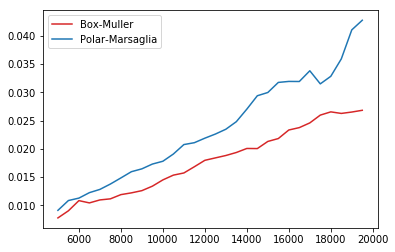

In theory, for the same number of inputs, execution time of the Box-Muller method is expected to be longer than the Polar-Marsaglia method because of the complexity of sine and cosine function. When we compare the execution time to get the same number of normally distributed random numbers, however, the Polar-Marsaglia method shows longer execution time due to the need of larger number (roughly 27%) of inputs.
From this result, we can conclude that the Box-Muller method is more efficient under the condition to get the large number of normally distributed random numbers.


In [7]:
##### 5. (f) execution time
n = range(5000, 20000, 500)
box_execution = list()
for x in n:
    start = time.time()
    box_z1, box_z2 = box_muller(x)
    box_time = time.time() - start
    box_execution.append(box_time)

polar_execution = list()
for y in n:
    start = time.time()
    while(True):
        polar_z1, polar_z2 = polar_marsaglia(round(y*4/pi*1.05)) # extra 5% inputs
        if (len(polar_z1) >= y and len(polar_z2) >= y):
            polar_z1 = polar_z1[0:y]
            polar_z2 = polar_z2[0:y]
            break
    polar_time = time.time() - start
    polar_execution.append(polar_time)

matrix7 = {'Box-Muller': box_execution,'Polar-Marsaglia': polar_execution}
df7 = pd.DataFrame(matrix7, columns = ['Box-Muller', 'Polar-Marsaglia'], index=n)
print('\n5. (f) Execution time comparison:\n', df7)

plt.plot(n, box_execution, color = 'tab:red')
plt.plot(n, polar_execution, color = 'tab:blue')
plt.gca().legend(('Box-Muller','Polar-Marsaglia'))
plt.show()

print('In theory, for the same number of inputs, execution time of the Box-Muller method is expected to be longer than the Polar-Marsaglia method because of the complexity of sine and cosine function. When we compare the execution time to get the same number of normally distributed random numbers, however, the Polar-Marsaglia method shows longer execution time due to the need of larger number (roughly 27%) of inputs.\nFrom this result, we can conclude that the Box-Muller method is more efficient under the condition to get the large number of normally distributed random numbers.')
